In [8]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad

x = np.array([3.8058516, 4.19437519, 1.37709166, 0.77009889, 5.20968912,
              0.65358179, 3.9701773, 2.07495512, 3.02571317, 3.1321825,
              3.10005197, 4.94755324, 2.26160675, 0.59817735, 1.19183984,
              1.37467926, -0.61701765, 5.01024433, 3.13300185, 5.2957513,
              5.49070323, -1.13532482, -0.34934039, 5.72120588, 1.23276086,
              4.33202401, 4.00250539, -0.40665993, 1.05709082, 3.68821387,
              1.12295318, 2.10739471, 0.53197551, -0.27389039, 1.48139076,
              0.70014346, 2.31649553, 2.44322569, 3.86141784, 2.04558533,
              2.98230541, 3.69456416, 2.35192256, 0.11488102, 1.24948211,
              2.34006925, 1.45962495, -0.09042347, -0.05130358, 1.15963357,
              0.56871108, 2.70715761, 2.47673624, 1.70400014, 1.60709535,
              -0.40534576, 3.07910114, 0.80967033, 5.04007949, 0.11755631,
              1.427098, -0.07170736, 5.11381387, 3.54324208, 4.39654794,
              0.10687046, 2.89288521, 4.23476606, 1.54499074, 2.68598353,
              -1.02087514, 1.9960533, 5.24364406, 3.2185187, -0.38242978,
              3.49462381, 1.06077727, -0.02623431, 3.92295454, 1.48746264,
              2.74412523, -0.29060423, 3.915251, 3.13072888, 3.78471126,
              -0.26904523, 0.66725871, 2.75931047, 2.09460576, 1.15288733,
              3.08004069, 2.51581013, 1.88470954, 3.18040196, 0.85962888,
              -0.2126045, 3.2505909, 2.7800464, 1.41144019, 2.71715232])

"""
Dado el desconocimiento de los parámetros, la constante de normalización se calcula como integral para ponderar su peso "desconocido"
"""

# Modelo considerando a C para "normalizar" la funcion de densidad y que f sea efectivamente una distribucion
def distribucion(x, a, b):
    integral, _ = quad(lambda t: 1 + np.cos((t - b) / a), -np.pi, np.pi)
    C = 2 * np.pi / integral #Constante de normalización
    return C / (2 * np.pi) * (1 + np.cos((x - b) / a))

# Ajuste de los parámetros usando curve_fit
iniciales = [0.5, 1.0]  
params, param_cov = curve_fit(distribucion, x, np.ones_like(x), iniciales)

# Resultados del ajuste
a, b = params
print(f"Estimación de a: {a}")
print(f"Estimación de b: {b}")


Estimación de a: 0.6850894242073734
Estimación de b: 0.023532255907166517


In [12]:
# Calcular intervalos de confianza del 95%
alpha = 0.05  
n = len(x)    # número de datos
dof = max(0, n - 2)  # grados de libertad

t_val = t.ppf(1 - alpha / 2, dof)
param_errors = np.sqrt(np.diag(covariance))
ci_a = [a - t_val * param_errors[0], a + t_val * param_errors[0]]
ci_b = [b - t_val * param_errors[1], b + t_val * param_errors[1]]

print(f"Intervalo de confianza del 95% para a: {ci_a}")
print(f"Intervalo de confianza del 95% para b: {ci_b}")

Intervalo de confianza del 95% para a: [np.float64(0.6699968753500807), np.float64(0.7001819730646661)]
Intervalo de confianza del 95% para b: [np.float64(-0.0747503885601021), np.float64(0.12181490037443515)]


Ejercicio 2

In [2]:
import numpy as np
from scipy.stats import t

# Datos de la muestra
x = np.array([3.8058516, 4.19437519, 1.37709166, 0.77009889, 5.20968912,
              0.65358179, 3.9701773, 2.07495512, 3.02571317, 3.1321825,
              3.10005197, 4.94755324, 2.26160675, 0.59817735, 1.19183984,
              1.37467926, -0.61701765, 5.01024433, 3.13300185, 5.2957513,
              5.49070323, -1.13532482, -0.34934039, 5.72120588, 1.23276086,
              4.33202401, 4.00250539, -0.40665993, 1.05709082, 3.68821387,
              1.12295318, 2.10739471, 0.53197551, -0.27389039, 1.48139076,
              0.70014346, 2.31649553, 2.44322569, 3.86141784, 2.04558533,
              2.98230541, 3.69456416, 2.35192256, 0.11488102, 1.24948211,
              2.34006925, 1.45962495, -0.09042347, -0.05130358, 1.15963357,
              0.56871108, 2.70715761, 2.47673624, 1.70400014, 1.60709535,
              -0.40534576, 3.07910114, 0.80967033, 5.04007949, 0.11755631,
              1.427098, -0.07170736, 5.11381387, 3.54324208, 4.39654794,
              0.10687046, 2.89288521, 4.23476606, 1.54499074, 2.68598353,
              -1.02087514, 1.9960533, 5.24364406, 3.2185187, -0.38242978,
              3.49462381, 1.06077727, -0.02623431, 3.92295454, 1.48746264,
              2.74412523, -0.29060423, 3.915251, 3.13072888, 3.78471126,
              -0.26904523, 0.66725871, 2.75931047, 2.09460576, 1.15288733,
              3.08004069, 2.51581013, 1.88470954, 3.18040196, 0.85962888,
              -0.2126045, 3.2505909, 2.7800464, 1.41144019, 2.71715232])

# Tamaño de la muestra
n = len(x)

# Promedio muestral
mean_x = np.mean(x)

# Desviación estándar muestral
std_x = np.std(x, ddof=1)

# Error estándar de la media
std_error = std_x / np.sqrt(n)

# Valor crítico de t para un intervalo de confianza del 95% y n - 1 grados de libertad
alpha = 0.05
t_val = t.ppf(1 - alpha / 2, n - 1)

# Intervalo de confianza
ci_lower = mean_x - t_val * std_error
ci_upper = mean_x + t_val * std_error

print(f"Promedio muestral (estimación de mu): {mean_x}")
print(f"Intervalo de confianza del 95% para mu: [{ci_lower}, {ci_upper}]")


Promedio muestral (estimación de mu): 2.1342042433999997
Intervalo de confianza del 95% para mu: [1.795202751766069, 2.4732057350339307]


#Ejercicio 3

In [4]:
import scipy.stats as stats

# Datos
s1_squ = 0.273  # Varianza muestral del primer proveedor
s2_squ = 0.094  # Varianza muestral del segundo proveedor
n1 = n2 = 10        # Tamaño de los proveedores

ratio_var = s1_squ / s2_squa

# Nivel de confianza y grados de libertad
alpha = 0.05
df1 = n1 - 1  # grados de libertad para el numerador
df2 = n2 - 1  # grados de libertad para el denominador

# Valores críticos de F para los límites inferior y superior
f_inf = stats.f.ppf(alpha / 2, df1, df2)
f_sup = stats.f.ppf(1 - alpha / 2, df1, df2)

# Intervalo de confianza para la razón de varianzas
inf = ratio_var / f_upper
sup = ratio_var / f_lower
print("Intervalo de confianza del 95%:", (inf, sup))


Intervalo de confianza del 95%: (np.float64(0.7213759396977253), np.float64(11.692514949055884))


#Ejercicio 4

In [5]:
import math

# Datos
x = 278  # Número de ejecutivos que consideran el flujo de caja como el indicador más importante
n = 415  # Tamaño de la muestra
z = 1.96 # Valor crítico para un intervalo de confianza del 95%

# Proporción muestral
p_hat = x / n

# Error estándar
standard_error = math.sqrt((p_hat * (1 - p_hat)) / n)

# Intervalo de confianza
inf = p_hat - z * standard_error
sup = p_hat + z * standard_error

print("Intervalo de confianza del 95%:", (inf, sup))


Intervalo de confianza del 95%: (0.6246349332007343, 0.7151241029438441)


#Ejercicio 5

Para resolver este ejercicio definimos la variable aleatoria Y que representa la cantidad de caras que se obtienen a través de dos tiradas, de aquí que hayan 3 valores posibles para: 0,1 y 2

In [8]:
from scipy.special import comb

# Probabilidades de la moneda sesgada
probs = [1/4, 3/4]

# Posibles valores de y
Y_valor = [0, 1, 2]

# Diccionario con probabilidades de cada combinación de probabilidad respecto al valor de la V.A. "Y"
probabilidades = {}
for p in probs:
    probabilidades[p] = []  
    for y in Y_valor:
        # La variable aleatoria "Y", de hecho, tiene una distribución binomial
        prob = comb(2, y) * (p ** y) * ((1 - p) ** (2 - y))
        probabilidades[p].append(prob)

# Mostrar las probabilidades
for p, probs in probabilidades.items():
    print(f"Para p = {p}:")
    for y, prob in zip(Y_valor, probs):
        print(f"  P(Y = {y}) = {prob}")
print("En conclusión, el valor que maximiza la probabilidad de obtener Y=y depende del valor de y\n Para Y=0, p = 1/4 maximiza la probabilidad de obtener este resultado\n Para Y= 1, es indiferente si usamos p = 1/4 o p = 3/4 \n Para Y=2, es p =3/4 el valor que maximiza la probabilidad")

Para p = 0.25:
  P(Y = 0) = 0.5625
  P(Y = 1) = 0.375
  P(Y = 2) = 0.0625
Para p = 0.75:
  P(Y = 0) = 0.0625
  P(Y = 1) = 0.375
  P(Y = 2) = 0.5625
En conclusión, el valor que maximiza la probabilidad de obtener Y=y depende del valor de y
 Para Y=0, p = 1/4 maximiza la probabilidad de obtener este resultado
 Para Y= 1, es indiferente si usamos p = 1/4 o p = 3/4 
 Para Y=2, es p =3/4 el valor que maximiza la probabilidad


#Ejercicio 6

In [9]:
import scipy.stats as stats
import math

n1, sum_xi_sq, x_bar1 = 10, 36950, 60
n2, sum_yi_sq, y_bar2 = 10, 25850, 50
alpha = 0.05

s_p_sq = ((sum_xi_sq - n1 * x_bar1**2) + (sum_yi_sq - n2 * y_bar2**2)) / (n1 + n2 - 2)
s_p = math.sqrt(s_p_sq)

# Estadístico de prueba
t_calculado = (x_bar1 - y_bar2) / (s_p * math.sqrt(1/n1 + 1/n2))

# Grados de libertad
df = n1 + n2 - 2

# Valor crítico t 
t_critico = stats.t.ppf(1 - alpha/2, df)

print(f"Estadístico t calculado: {t_calculado}")
print(f"Valor crítico t: ±{t_critico}")

print("Como el estadístico de prueba es mayor que el valor crítico, rechazamos la hipótesis nula: Existe una diferencia significativa entre las medias.")



Estadístico t calculado: 2.23606797749979
Valor crítico t: ±2.10092204024096
Rechazamos la hipótesis nula: Existe una diferencia significativa entre las medias.


#Ejercicio 7

In [10]:
import numpy as np
from scipy.stats import ttest_ind, t

tipo_a = np.array([72, 78, 73, 69, 75, 74, 69, 75])
tipo_b = np.array([78, 76, 81, 74, 82, 75])

#Prueba t
t_stat, p_value = ttest_ind(tipo_a, tipo_b, equal_var=True)

#Intervalo
n_a, n_b = len(tipo_a), len(tipo_b)
media_A, media_B = np.mean(tipo_a), np.mean(tipo_b)
var_a, var_b = np.var(tipo_a, ddof=1), np.var(tipo_b, ddof=1)
Sp = np.sqrt(((n_a - 1) * var_a + (n_b - 1) * var_b) / (n_a + n_b - 2))
var = Sp * np.sqrt(1 / n_a + 1 / n_b)

# Grados de libertad
df = n_a + n_b - 2

# Valor crítico para el intervalo de confianza del 90%
t_crit = t.ppf(0.95, df)

# Límite inferior y superior del intervalo
inf = (media_A - media_B) - t_crit * var
sup = (media_A - media_B) + t_crit * var


print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")
print("Se rechaza la hipotesis nula, existe evidencia suficiente para concluir que hay una diferencia significativa entre las medias")
print(f"Intervalo de confianza: ({inf:.2f}, {sup:.2f})")




Estadístico t: -2.657
Valor p: 0.021
Se rechaza la hipotesis nula, existe evidencia suficiente para concluir que hay una diferencia significativa entre las medias
Intervalo de confianza: (-7.59, -1.50)


#Ejercicio 8

In [14]:
import numpy as np
from scipy.stats import t

material_A = np.array([1.25, 1.16, 1.33, 1.15, 1.23, 1.20, 1.32, 1.28, 1.21])
material_B = np.array([0.89, 1.01, 0.97, 0.95, 0.94, 1.02, 0.98, 1.06, 0.98])

media_A = np.mean(material_A)
media_B = np.mean(material_B)

var_A = np.var(material_A, ddof=1)
var_B = np.var(material_B, ddof=1)

n_A = 9
n_B = 9

S_p = ((n_A - 1) * var_A + (n_B - 1) * var_B) / (n_A + n_B - 2)
est_prue = (media_A - media_B) / np.sqrt(S_p * (1/n_A + 1/n_B))

alpha = 0.10
dof = n_A + n_B - 2

t_est = t.ppf(1 - alpha/2, dof)


print("Estadistico de prueba:", est_prue)
print("t estadístico:", t_est)

print("Rechazamos la hipótesis nula: existe una diferencia significativa entre las medias.")


Estadistico de prueba: 9.564131954889964
t estadístico: 1.74588367627624
Rechazamos la hipótesis nula: existe una diferencia significativa entre las medias.


#Ejercicio 9

In [2]:
import numpy as np
from scipy.stats import t

octa = np.array([89, 93, 87, 90, 89, 95, 100, 98])
mpg = np.array([13.0, 13.2, 13.0, 13.6, 13.3, 13.8, 14.1, 14.0])
n = len(octa)
r = np.corrcoef(octa, mpg)[0, 1]

t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

# Nivel de significancia
alpha = 0.05

t_crit = t.ppf(1 - alpha / 2, n - 2)

print("Coeficiente de correlación (r):", r)
print("Estadístico t:", t_stat)
print("Valor crítico de t para α = 0.05:", t_crit)
print("Rechazamos la hipótesis nula: hay suficiente evidencia para afirmar que el nivel de octanaje y las millas por galón son dependientes.")


Coeficiente de correlación (r): 0.8914018631719386
Estadístico t: 4.817770069955905
Valor crítico de t para α = 0.05: 2.4469118511449692
Rechazamos la hipótesis nula: hay suficiente evidencia para afirmar que el nivel de octanaje y las millas por galón son dependientes.


Ejercicio 10

In [4]:
import pandas as pd
import statsmodels.api as sm

data = {
    "Rendimiento": [21, 23, 26, 22, 23, 28],
    "Presión": [50, 50, 50, 80, 80, 80],
    "Temperatura": [100, 200, 300, 100, 200, 300],
}

df = pd.DataFrame(data)

df["Temperatura^2"] = df["Temperatura"] ** 2

X = df[["Presión", "Temperatura", "Temperatura^2"]]
X = sm.add_constant(X)  
y = df["Rendimiento"]

# Ajustar el modelo 
model = sm.OLS(y, X).fit()

beta0 = model.params["const"]
beta1 = model.params["Presión"]
beta2 = model.params["Temperatura"]
beta3 = model.params["Temperatura^2"]

print(f"El modelo ajustado es: y = {beta0:.2f} + {beta1:.4f}*Presión + {beta2:.4f}*Temperatura + {beta3:.4f}*Temperatura^2")

# Prueba para beta3 
p_value_beta3 = model.pvalues["Temperatura^2"]
print(f"\nPrueba para el término cuadrático de la temperatura (beta3):")
print(f"Coeficiente beta3: {beta3:.4f}, valor p: {p_value_beta3:.4f}")
print("El término cuadrático de la temperatura no afecta significativamente el rendimiento a un nivel de 0.05.")


p_value_beta2 = model.pvalues["Temperatura"]

print(f"\nPrueba t para el efecto de la temperatura (beta2):")
print(f"valor p: {p_value_beta2:.4f}")
print("La temperatura no afecta significativamente el rendimiento (no rechazamos H0) EN ESTE MODELO a un nuvel de .05 (No consideramos termino cuadratico en la prueba pues ya lo habiamos descartado)")

El modelo ajustado es: y = 20.33 + 0.0333*Presión + -0.0225*Temperatura + 0.0001*Temperatura^2

Prueba para el término cuadrático de la temperatura (beta3):
Coeficiente beta3: 0.0001, valor p: 0.1780
El término cuadrático de la temperatura no afecta significativamente el rendimiento a un nivel de 0.05.

Prueba t para el efecto de la temperatura (beta2):
valor p: 0.4592
La temperatura no afecta significativamente el rendimiento (no rechazamos H0) EN ESTE MODELO a un nuvel de .05 (No consideramos termino cuadratico en la prueba pues ya lo habiamos descartado)


Ejercicio 11

Coeficientes estimados (betas): [11.8  -2.46  1.01 -0.41]


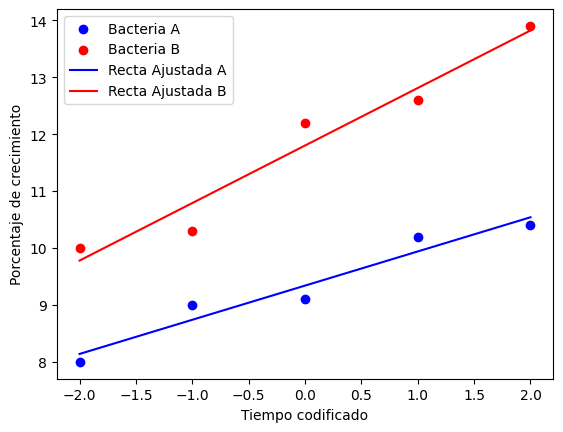

Predicción para Bacteria A en x2=0: 9.339999999999998
Predicción para Bacteria B en x2=0: 11.800000000000004
Coeficiente de interacción (β3): -0.4099999999999966
P-valor del coeficiente de interacción: 0.03924040998017242 Por lo tanto, se rechaza la hipotesis nula y B_3 es distinto de 0
Hay evidencia suficiente (p = 0.000) para concluir que los porcentajes de crecimiento (B_1)son significativamente diferentes entre las bacterias.

Dado que el termino de interacion B_3 y el termino de crecimiento relacionado a tipo de bacteria B_1 son significativamente distintos de 0, se concluye que los porcentajes de crecimiento sí varían según el tipo de Bacteria al nivel de 0.05


In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

tiempo = np.array([-2, -1, 0, 1, 2])
bacteria_a = np.array([8.0, 9.0, 9.1, 10.2, 10.4])
bacteria_b = np.array([10.0, 10.3, 12.2, 12.6, 13.9])

# Crear variables para el modelo, las analizaremos "de manera conjuntaa"
x1 = np.concatenate((np.ones_like(tiempo), np.zeros_like(tiempo)))  # 1 para bacteria A, 0 para bacteria B
x2 = np.concatenate((tiempo, tiempo))  # Tiempo para ambas variables
x1_x2 = x1 * x2  # Interacción
y = np.concatenate((bacteria_a, bacteria_b))  # Respuesta
#matriz X
X = np.column_stack((np.ones_like(y), x1, x2, x1_x2))
model = sm.OLS(y, X).fit()


# Graficar 
plt.scatter(tiempo, bacteria_a, label='Bacteria A', color='blue')
plt.scatter(tiempo, bacteria_b, label='Bacteria B', color='red')
print("Coeficientes estimados (betas):", model.params)
tiempo_full = np.linspace(min(tiempo), max(tiempo), 100)
X_a = np.column_stack((np.ones_like(tiempo_full), np.ones_like(tiempo_full), tiempo_full, tiempo_full))
X_b = np.column_stack((np.ones_like(tiempo_full), np.zeros_like(tiempo_full), tiempo_full, np.zeros_like(tiempo_full)))
y_a_pred = model.predict(X_a)
y_b_pred = model.predict(X_b)

plt.plot(tiempo_full, y_a_pred, color='blue', label='Recta Ajustada A')
plt.plot(tiempo_full, y_b_pred, color='red', label='Recta Ajustada B')

plt.xlabel('Tiempo codificado')
plt.ylabel('Porcentaje de crecimiento')
plt.legend()
plt.show()

pred_a = model.predict([1, 1, 0, 0])
pred_b = model.predict([1, 0, 0, 0])
print(f"Predicción para Bacteria A en x2=0: {pred_a[0]}")
print(f"Predicción para Bacteria B en x2=0: {pred_b[0]}")


print("Coeficiente de interacción (β3):", model.params[3])
print("P-valor del coeficiente de interacción:", model.pvalues[3], "Por lo tanto, se rechaza la hipotesis nula y B_3 es distinto de 0")
# Coeficiente B1 y su p-valor
b1 = model.params[1]
p_valor_b1 = model.pvalues[1]

print(f"Hay evidencia suficiente (p = {p_valor_b1:.3f}) para concluir que los porcentajes de crecimiento (B_1)son significativamente diferentes entre las bacterias.")
print("\nDado que el termino de interacion B_3 y el termino de crecimiento relacionado a tipo de bacteria B_1 son significativamente distintos de 0, se concluye que los porcentajes de crecimiento sí varían según el tipo de Bacteria al nivel de 0.05")

Ejercicio 12 

In [7]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("datos.csv")
print(data.head())

grupo_a = data[data['Grupo'] == 'Grupo A']['Datos']
grupo_b = data[data['Grupo'] == 'Grupo B']['Datos']

# Realizar la prueba ANOVA
anova = stats.f_oneway(grupo_a, grupo_b)

print("\nResultado de ANOVA:")
print("Estadístico F:", anova.statistic)
print("Valor p:", anova.pvalue)

print("No se encontraron diferencias significativas entre los dos grupos.")


     Grupo  Datos
0  Grupo A    5.8
1  Grupo A    3.1
2  Grupo A    7.2
3  Grupo A    2.6
4  Grupo A    6.7

Resultado de ANOVA:
Estadístico F: 0.017511360676141122
Valor p: 0.8973476766572029
No se encontraron diferencias significativas entre los dos grupos.


Ejercicio 13

     Grupo  Datos
0  Grupo A    5.8
1  Grupo A    3.1
2  Grupo A    7.2
3  Grupo A    2.6
4  Grupo A    6.7
Resultado de la prueba t:
Estadístico t: -0.13233049790634502
Valor p: 0.8977104712378924
No se encontraron diferencias significativas entre los dos grupos.

Prueba de normalidad (Shapiro-Wilk):
Grupo A: Estadístico = 0.9267433887989509 , Valor p = 0.5551977358822437
Grupo B: Estadístico = 0.8947595168505995 , Valor p = 0.34388057905496705
El Grupo A parece tener distribución normal.
El Grupo B parece tener distribución normal.


C:\Users\HP\AppData\Local\Temp\ipykernel_16072\3312599476.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grupo_a, label="Grupo A", shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16072\3312599476.py:52: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grupo_b, label="Grupo B", shade=True)


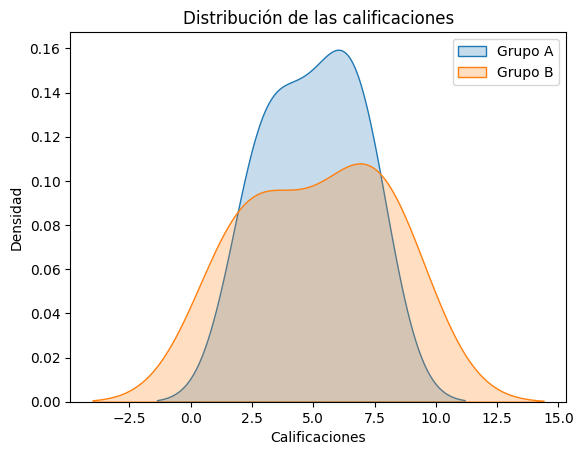


Prueba Mann-Whitney U:
Estadístico U: 17.0
Valor p: 0.9372294372294373
No hay diferencias significativas en las medianas entre Grupo A y Grupo B.


In [5]:

# Prueba de Shapiro-Wilk para determinar si los datos son normales
normalidad_a = stats.shapiro(grupo_a)
normalidad_b = stats.shapiro(grupo_b)

print("\nPrueba de normalidad (Shapiro-Wilk):")
print("Grupo A: Estadístico =", normalidad_a.statistic, ", Valor p =", normalidad_a.pvalue)
print("Grupo B: Estadístico =", normalidad_b.statistic, ", Valor p =", normalidad_b.pvalue)

print("El Grupo A tiene una distribución normal a un nivel de significancia de 0.05")
print("El Grupo B tiene una distribución normal a un nivel de significancia de 0.05")

# Gráficos para observar la distribución
sns.kdeplot(grupo_a, label="Grupo A", shade=True)
sns.kdeplot(grupo_b, label="Grupo B", shade=True)
plt.title("Distribución de las calificaciones")
plt.xlabel("Calificaciones")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# b) Prueba de hipótesis no paramétrica (Mann-Whitney U Test)
valor = stats.mannwhitneyu(grupo_a, grupo_b, alternative='two-sided')

print("\nPrueba Mann-Whitney U:")
print("Estadístico U:", valor.statistic)
print("Valor p:", valor.pvalue)

print("No rechazamos la hipotesis nula, se deduce que no hay diferencias significativas en las medianas entre Grupo A y Grupo B.")
